## Governing Equation for Discretized Water Flow in a Porous Medium

The equation below encapsulates the fundamental mechanisms governing the transient behavior of water flow in a discretized porous medium:

\begin{equation}
\underbrace{\Big[\Phi_{\text{ref}} V \left( \frac{\partial m_\phi(p)}{\partial p} b(p) + m_\phi(p) \frac{\partial b(p)}{\partial p} \right) \frac{dp}{dt} \Big]_i}_{\text{Transient term in block }i, \, \left[\frac{m^3}{s} \right]}
+ \underbrace{\sum_{j \in C(i)} \left[ \left[b(p) \lambda m_T(p) \right]_i T_{ij} (p_{i} - p_{j}) \right]}_{\text{Flow between connected blocks}, \, \left[\frac{m^3}{s} \right]}
+ \underbrace{T_{w,i}M_{i} (p_i - p_{bhp,w})}_{\text{Inflow into well within block }i, \, \left[\frac{m^3}{s} \right]} = 0
\end{equation}


### Initial Conditions

The system initiates with a constant pressure $ p_i = \text{const} $ across all cells $i$.

### Nomenclature with Units
- $ \Phi_{\text{ref,i}} $: Reference porosity in cell $i$, assumed constant. [Dimensionless]
- $ V_i $: Volume of cell $i$, assumed constant. [$m^3$]
- $ m_{\phi,i} $: Pore volume multiplier as a function of pressure in cell $i$. [Dimensionless]
- $ b_i $: Formation volume factor, which relates reservoir volume to surface volume; a function of pressure. [$m^3/m^3$]
- $ C(i) $: Set of cells connected to cell $i$. [Set]
- $ \lambda $: Mobility of the water phase. [$m^2/(Pa \cdot s)$]
- $ m_{T,i} $: Transmissibility multiplier, a function of pressure in cell $i$. [Dimensionless]
- $ T_{ij} $: Transmissibility factor between cells $i$ and $j$. [$m^2/(Pa \cdot s)$]
- $ p_i $: Pressure in cell $i$. [$Pa$]
- $ T_{w,i} $: Transmissibility of the well connection in cell $i$. [$m^2/(Pa \cdot s)$]
- $ M_{i} $: Mobility of the water phase in well connection at cell $i$. [$m^2/(Pa \cdot s)$]
- $ p_{bhp,w} $: Bottomhole pressure of the well, if present. [$Pa$]


### 1. Transient Term in Block $i$

$$
\underbrace{\Big[\Phi_{\text{ref}} V \left( \frac{\partial m_\phi(p)}{\partial p} b(p) + m_\phi(p) \frac{\partial b(p)}{\partial p} \right) \frac{dp}{dt} \Big]_i}_{\text{Transient term in block }i, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term captures the change in water volume within a grid block as time progresses. It is termed as the 'transient' term because it accounts for the time-varying accumulation or depletion of water within the cell. Specifically:

- $ \Phi_{\text{ref}} $: Reference porosity defines the initial proportion of the volume in the rock that is occupied by the fluid. It represents the inherent porosity of the rock.
  
- $ V $: Volume of the grid cell. This, in combination with porosity, gives us the total pore volume.

- $ m_\phi(p) $: This is the pore volume multiplier. It gives the change in pore volume due to pressure changes. The derivative $\frac{\partial m_\phi(p)}{\partial p}$ gives the rate of change of this multiplier with respect to pressure, showing how sensitive the pore volume is to pressure changes.

- $ b(p) $: This is the formation volume factor. It tells us how much volume a given amount of water at reservoir conditions would occupy at the surface. Its derivative $\frac{\partial b(p)}{\partial p}$ gives the rate of change of the formation volume factor with pressure.

- $ \frac{dp}{dt} $: This represents the rate of change of pressure with time in the grid block.

Combining these components, this term provides the rate of change of water volume in the grid cell with time, incorporating the effects of porosity, pore volume changes due to pressure, and formation volume factor changes.

---

### 2. Flow Between Connected Blocks

$$
\underbrace{\sum_{j \in C(i)} \left[ \left[b(p) \lambda m_T(p) \right]_i T_{ij} (p_{i} - p_{j}) \right]}_{\text{Flow between connected blocks}, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term models the flow of water between neighboring grid blocks. The flow is driven by pressure differences between the blocks and is moderated by the transmissibility between them. Specifically:

- $ \lambda $: This is the mobility of the water phase, which indicates how easily the water can flow. It's a combination of permeability and viscosity.

- $ m_T(p) $: This is the transmissibility multiplier, which can vary with pressure.

- $ T_{ij} $: This represents the transmissibility between blocks $i$ and $j$. It encapsulates the inherent ability of the two blocks to transmit fluid between them based on the properties of the rock and fluid.

- $ (p_{i} - p_{j}) $: The pressure difference between blocks $i$ and $j$. The flow is from a region of higher pressure to a region of lower pressure.

---

### 3. Inflow Into Well Within Block $i$

$$
\underbrace{T_{w,i}M_{i} (p_i - p_{bhp,w})}_{\text{Inflow into well within block }i, \, \left[\frac{m^3}{s} \right]}
$$

**Explanation:**

This term models the inflow (or outflow) of water to (or from) a well that is connected to block $i$. The flow is driven by the pressure difference between the block and the well's bottomhole pressure. Specifically:

- $ T_{w,i} $: Transmissibility of the well connection in block $i$. It represents the capacity of the wellbore in that block to allow fluid flow.

- $ M_{i} $: Mobility of the water phase in the well connection at block $i$.

- $ (p_i - p_{bhp,w}) $: The pressure difference between the grid block $i$ and the bottomhole pressure of the well. The fluid will flow into or out of the well based on this difference.


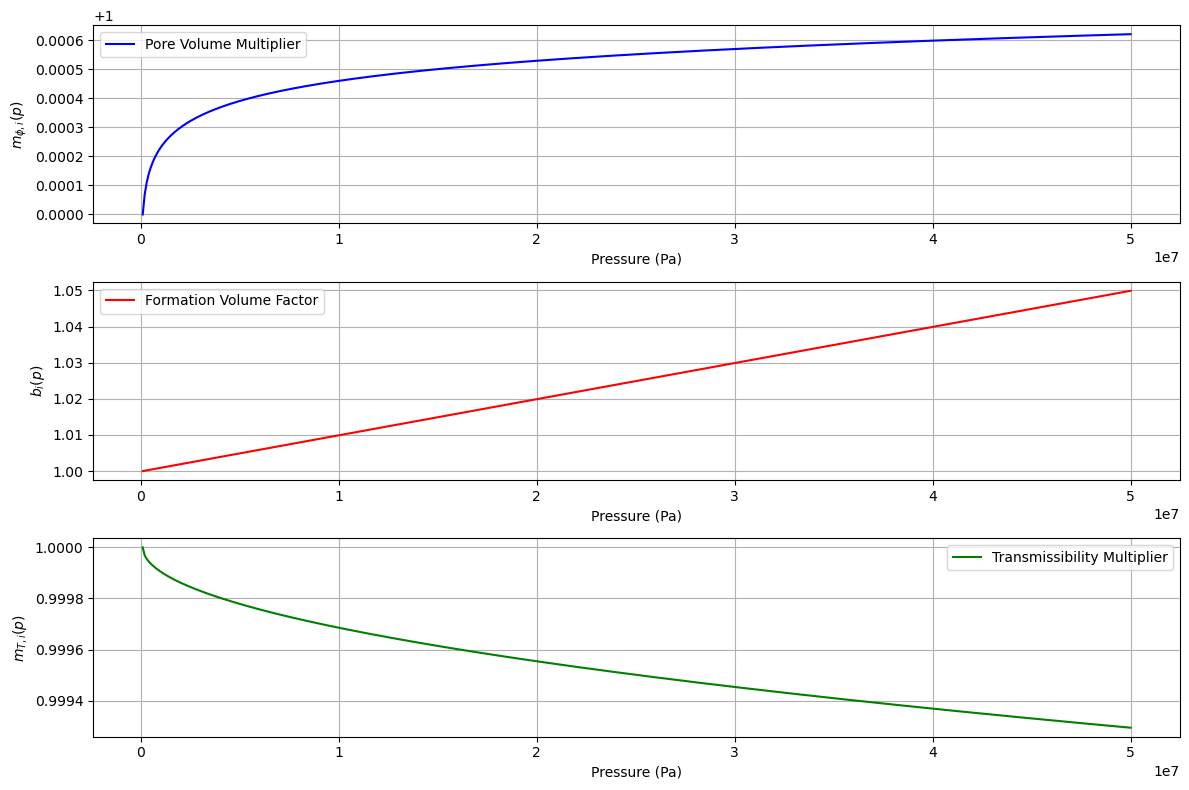

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants and Parameters
BASE_PRESSURE = 1e5  # A typical base pressure value for reservoirs, in Pascals
MAX_PRESSURE = 5e7   # Pa, assumed maximum reservoir pressure
PHI_MULTIPLIER_COEFF = 0.0001
B_FACTOR_COEFF = 1e-9
M_TRANS_COEFF = 0.0001
T_MULTIPLIER_COEFF = 1e-7  # A coefficient to determine the rate of decrease

def pore_volume_multiplier(p):
    """Pore volume multiplier as a function of pressure."""
    m_phi = 1 + PHI_MULTIPLIER_COEFF * np.log(p/BASE_PRESSURE)
    return max(1, m_phi)

def formation_volume_factor(p):
    """Formation volume factor as a function of pressure."""
    b = 1 + B_FACTOR_COEFF * (p - BASE_PRESSURE)
    return max(1, b)

def transmissibility_multiplier(p):
    """Transmissibility multiplier as a function of pressure."""
    m_T = 1 - T_MULTIPLIER_COEFF * math.sqrt(p - BASE_PRESSURE)
    return max(0.2, m_T)  # ensuring it doesn't drop too low

# Generate pressure values
pressures = np.linspace(BASE_PRESSURE, MAX_PRESSURE, 500)

# Generate property values for each pressure
m_phi_values = [pore_volume_multiplier(p) for p in pressures]
b_values = [formation_volume_factor(p) for p in pressures]
m_T_values = [transmissibility_multiplier(p) for p in pressures]

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(pressures, m_phi_values, '-b', label="Pore Volume Multiplier")
plt.xlabel("Pressure (Pa)")
plt.ylabel("$m_{\phi,i}(p)$")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(pressures, b_values, '-r', label="Formation Volume Factor")
plt.xlabel("Pressure (Pa)")
plt.ylabel("$b_i(p)$")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(pressures, m_T_values, '-g', label="Transmissibility Multiplier")
plt.xlabel("Pressure (Pa)")
plt.ylabel("$m_{T,i}(p)$")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Porosity =  [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
Volume =  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Lambda =  1.0
Initial Pressure =  [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100

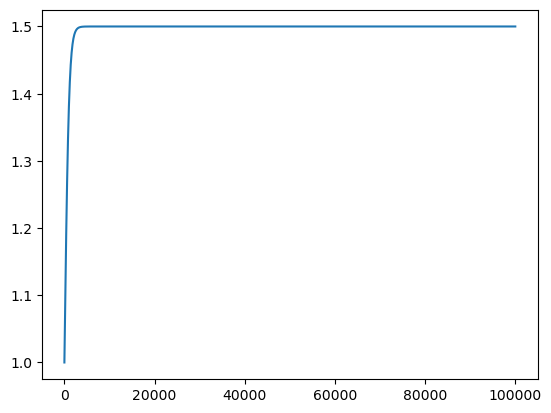

In [3]:
import numpy as np

n = 100
poro = np.zeros(n) + 0.3  # Porosity
print('Porosity = ', poro)
V = np.zeros(n) + 0.5  # Volume of each cell
print('Volume = ', V)
lam = 1.  # Mobility (Lambda)
print('Lambda = ', lam)
p0 = np.zeros(n) + 100.  # Initial pressure in each cell
print('Initial Pressure = ', p0)
# Well Index
w = np.zeros(n)
w[5] = 1
well_mobility = 0.5
well_transmissibility = 0.001

# Make a T matrix where adjacent cells are connected with a 1 and all else is 0
T = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if abs(i - j) == 1:
            T[i, j] = 1.

# Function for pore volume multiplier based on pressure
def pore_volume_multiplier(pressure, dp=False):
    if dp:
        return 0.5 / 1000 * (1 - np.tanh(pressure / 1000)**2)
    else:
        return 1. + 0.5 * np.tanh(pressure / 1000)
    
# plot pore volume multiplier
pressures = np.linspace(0, 100000, 1000)
plt.plot(pressures, pore_volume_multiplier(pressures))

# Function for formation volume factor based on pressure
def formation_volume_factor(pressure, dp=False):
    if dp:
        return np.zeros(n)
    else:
        return np.ones(n)

# Function for transmissibility multiplier based on pressure
def transmissibility_multiplier(pressure, dp=False):
    if dp:
        return np.zeros(n)
    else:
        return np.ones(n)


def initialize_simulation(n):
    # Initialize parameters
    poro = np.full(n, 0.3)
    V = np.full(n, 0.5)
    lam = 1.0
    p0 = np.full(n, 100.0)
    return poro, V, lam, p0

def setup_connection_matrix(n):
    T = np.zeros((n, n))
    for i in range(n-1):
        T[i, i+1] = 1.
        T[i+1, i] = 1.
    return T

def update_pressure(p, A, B, C, dt):
    epsilon = 1e-9  # Regularization term
    A_reg = A + np.eye(A.shape[0]) * epsilon  # Regularized A
    try:
        dpt = np.linalg.solve(A_reg, -B - C)
    except np.linalg.LinAlgError as e:
        print("Matrix is singular:", e)
        return p  # No update
    return p + dt * dpt, p, dpt

# Initialize simulation
poro, V, lam, p0 = initialize_simulation(n)

# Set up connectivity matrix
T = setup_connection_matrix(n)

# Time stepping
dt = 0.000001
p = p0.copy()
for k in range(10):
    # Compute the transient term
    A = np.diag(poro * V * (pore_volume_multiplier(p, dp=True) * formation_volume_factor(p) + 
                            pore_volume_multiplier(p) * formation_volume_factor(p, dp=True)))

    # Compute the convective term
    pi_pj = p[:, None] - p
    B = np.sum(T * formation_volume_factor(p) * lam * transmissibility_multiplier(p) * pi_pj, axis=1)

    # Compute the well term
    pbhp = p.copy()
    pbhp[5] = 0  # Well at cell 5
    C = well_mobility * well_transmissibility * (p - pbhp)

    # Update pressure
    p, pp, dpt = update_pressure(p, A, B, C, dt)

    # plot pressure
    # plt.plot(p)
    # plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
n = 100
cell_volume = 0.5

# More realistic porosity and volume distributions
poro = np.ones(n) * 0.3  # Porosity
V = np.ones(n) * cell_volume
lam = 1.0  # Mobility
p0 = np.full(n, 100.0)  # Initial pressure

# Well information
w = np.zeros(n)
w[5] = 1
well_mobility = np.ones(n) * 0.5
well_transmissibility = np.ones(n) * 0.001

# Formation Volume Factor
b0 = 1.0
beta = 1e-7

# Connectivity Matrix
T = np.zeros((n, n))
for i in range(n - 1):
    T[i, i + 1] = 1.0
    T[i + 1, i] = 1.0

# Pore volume multiplier
def pore_volume_multiplier(p, dp=False):
    if dp:
        return 0.5 / 1000 * (1 - np.tanh(p / 1000)**2)
    else:
        return 1. + 0.5 * np.tanh(p / 1000)

# Formation volume factor
def formation_volume_factor(p, dp=False):
    if dp:
        return beta * b0 * np.exp(beta * (p - 100))
    else:
        return b0 * np.exp(beta * (p - 100))

# Transmissibility multiplier
def transmissibility_multiplier(p, dp=False):
    return np.ones(n)

# Update pressure
def update_pressure(p, A, B, C, dt):
    epsilon = 1e-9
    A_reg = A + np.eye(A.shape[0]) * epsilon
    try:
        dpt = np.linalg.solve(A_reg, -B - C)
    except np.linalg.LinAlgError as e:
        print("Matrix is singular:", e)
        return p
    return p + dt * dpt

# Time-stepping
dt = 1e-6
p = p0.copy()
t = 0

for k in range(100000):
    A = np.diag(poro * V * (pore_volume_multiplier(p, dp=True) * formation_volume_factor(p) + 
                            pore_volume_multiplier(p) * formation_volume_factor(p, dp=True)))
    
    pi_pj = p[:, None] - p
    B = np.sum(T * formation_volume_factor(p) * lam * transmissibility_multiplier(p) * pi_pj, axis=1)
    
    pbhp = p.copy()
    pbhp[5] = 0
    C = well_mobility * well_transmissibility * (p - pbhp)

    p = update_pressure(p, A, B, C, dt)
    t += dt


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_simulation(n):
    poro = np.random.normal(0.3, 0.05, n)  # Gaussian distribution
    V = np.random.normal(0.5, 0.1, n)  # Gaussian distribution
    lam = 1.0  # Mobility
    p0 = np.random.normal(100, 5, n)  # Initial pressure with Gaussian distribution
    return poro, V, lam, p0

def setup_connection_matrix(n):
    T = np.zeros((n, n))
    np.fill_diagonal(T[:-1, 1:], 1)
    np.fill_diagonal(T[1:, :-1], 1)
    return T

def update_pressure(p, A, B, C, dt):
    epsilon = 1e-9
    A_reg = A + np.eye(A.shape[0]) * epsilon
    try:
        dpt = np.linalg.solve(A_reg, -B - C)
    except np.linalg.LinAlgError as e:
        print("Matrix is singular:", e)
        return p
    return p + dt * dpt

# Pore volume multiplier
def pore_volume_multiplier(p, dp=False):
    if dp:
        return 0.5 / 1000 * (1 - np.tanh(p / 1000)**2)
    else:
        return 1. + 0.5 * np.tanh(p / 1000)

# Formation volume factor
def formation_volume_factor(p, dp=False):
    if dp:
        return beta * b0 * np.exp(beta * (p - 100))
    else:
        return b0 * np.exp(beta * (p - 100))

# Transmissibility multiplier
def transmissibility_multiplier(p, dp=False):
    return np.ones(n)

# Initialize simulation
n = 100
poro, V, lam, p0 = initialize_simulation(n)

# Well information
w = np.zeros(n)
w[5] = 1
well_mobility = np.random.normal(0.5, 0.05, n)
well_transmissibility = np.random.normal(0.001, 0.0001, n)

# Connectivity matrix
T = setup_connection_matrix(n)

# Time stepping
dt = 1e-6
p = p0.copy()
t = 0

P_VALUES = [p.copy()]
for k in range(1000):
    A = np.diag(poro * V * (pore_volume_multiplier(p, True) * formation_volume_factor(p) + 
                            pore_volume_multiplier(p) * formation_volume_factor(p, True)))
    
    pi_pj = p[:, None] - p  # delta pressure between cells
    B = np.sum(T * formation_volume_factor(p) * lam * transmissibility_multiplier(p) * pi_pj, axis=1)
    
    pbhp = p.copy()
    pbhp[5] = 0  # Boundary condition for well
    C = well_mobility * well_transmissibility * (p - pbhp)

    p = update_pressure(p, A, B, C, dt)
    t += dt
    P_VALUES.append(p.copy())

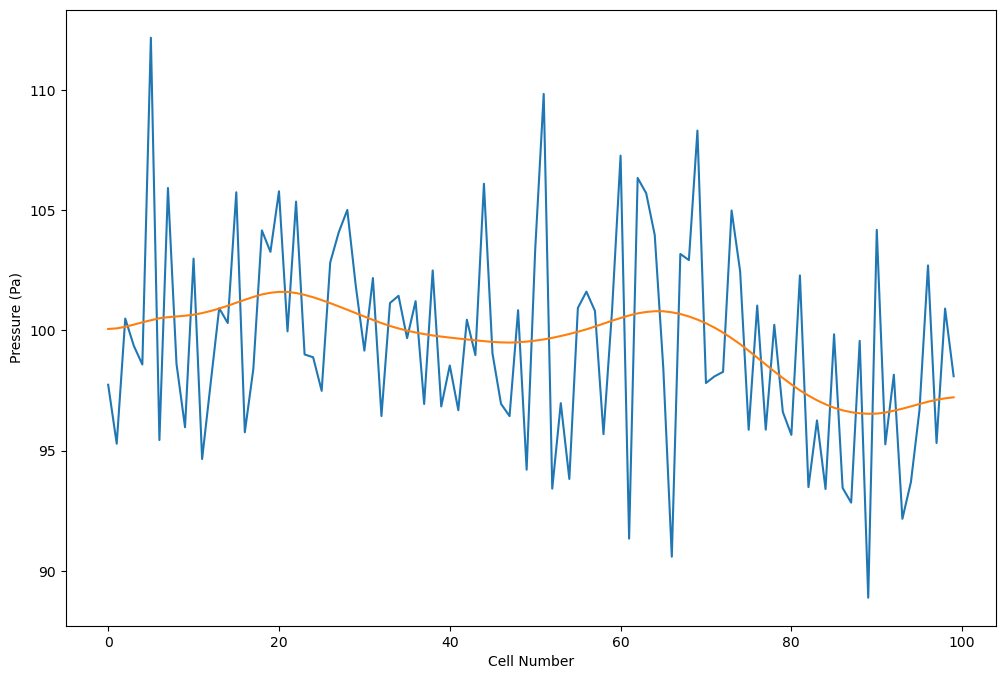

In [29]:
# plot the pressure
plt.figure(figsize=(12, 8))
plt.plot(P_VALUES[0])
plt.plot(P_VALUES[-1])
plt.xlabel("Cell Number")
plt.ylabel("Pressure (Pa)")
plt.show()
